🔍 Preview of Raw Data:
   ProductID   ProductName     Category    Price  Stock
0        101      Notebook   Stationery     50.0  100.0
1        102        Pencil   Stationery      NaN  300.0
2        103        Laptop  Electronics  55000.0   20.0
3        104  Water Bottle          NaN    120.0  150.0
4        105      Notebook   Stationery     50.0  100.0

🧼 Null Values Before Cleaning:
ProductID      0
ProductName    1
Category       1
Price          1
Stock          1
dtype: int64

✅ Null Values After Cleaning:
ProductID      0
ProductName    0
Category       0
Price          0
Stock          0
dtype: int64

💾 Cleaned dataset saved as 'products_cleaned.csv'


/tmp/ipython-input-7-632897895.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Stock', data=df, estimator=sum, palette='pastel')


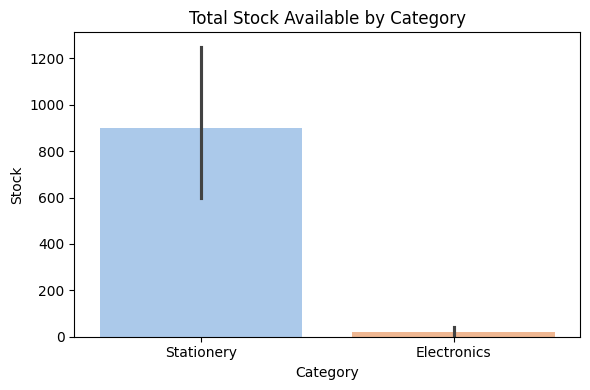

/tmp/ipython-input-7-632897895.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=df, palette='Set2')


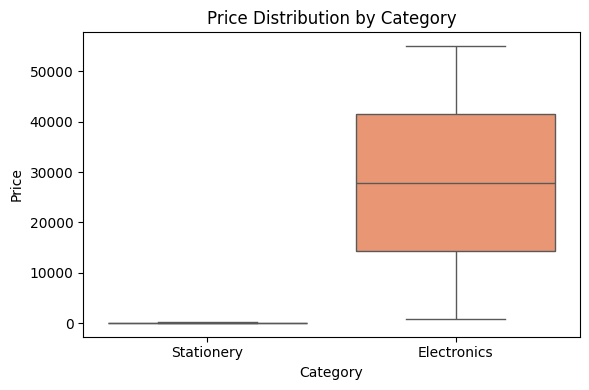

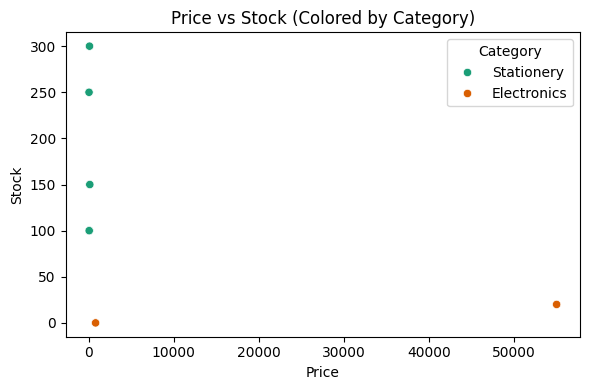

In [7]:
# 📌 Task 2 – Data Cleaning on 'products_raw.csv'

# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np

# ✅ Step 2: Load Raw Dataset
df = pd.read_csv("products_raw.csv")

# ✅ Step 3: Preview Raw Data
print("🔍 Preview of Raw Data:")
print(df.head())

# ✅ Step 4: Check for Null Values
print("\n🧼 Null Values Before Cleaning:")
print(df.isnull().sum())

# ✅ Step 5: Drop Duplicate Rows
df.drop_duplicates(inplace=True)

# ✅ Step 6: Handle Missing Values

# Fill missing Price with median
df['Price'] = df['Price'].fillna(df['Price'].median())

# Fill missing Stock with 0 (assuming 0 stock is better than NaN)
df['Stock'] = df['Stock'].fillna(0)

# Fill missing Category with most common category
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])

# Fill missing ProductName with 'Unknown'
df['ProductName'] = df['ProductName'].fillna("Unknown")

# ✅ Step 7: Format/Clean Text Columns

# Strip whitespace and capitalize each word in ProductName and Category
df['ProductName'] = df['ProductName'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()

# ✅ Step 8: Show Cleaned Null Values Count
print("\n✅ Null Values After Cleaning:")
print(df.isnull().sum())

# ✅ Step 9: Save Cleaned Data
df.to_csv("products_cleaned.csv", index=False)
print("\n💾 Cleaned dataset saved as 'products_cleaned.csv'")

import matplotlib.pyplot as plt
import seaborn as sns


# 1. Bar Plot – Total stock by category
plt.figure(figsize=(6,4))
sns.barplot(x='Category', y='Stock', data=df, estimator=sum, palette='pastel')
plt.title('Total Stock Available by Category')
plt.tight_layout()
plt.savefig("category_stock_plot.png")
plt.show()

# 2. Box Plot – Price distribution by category
plt.figure(figsize=(6,4))
sns.boxplot(x='Category', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by Category')
plt.tight_layout()
plt.savefig("price_boxplot.png")
plt.show()

# 3. Scatter Plot – Price vs Stock
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price', y='Stock', data=df, hue='Category', palette='Dark2')
plt.title('Price vs Stock (Colored by Category)')
plt.tight_layout()
plt.savefig("price_vs_stock.png")
plt.show()
